## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 2. Importing Datasets

### 2.1  Rating Dataset 

In [3]:
column_names = ["user_id", "movie_id", "rating", "timestamp"]
rating_df = pd.read_csv("ml-100k/u.data", names = column_names, sep = "\t")
rating_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# dropping timestamp column because it is not relevant
rating_df = rating_df.drop("timestamp", axis = 1)
rating_df.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### 2.2 Movie Dataset

In [5]:
movie_df = pd.read_csv("ml-100k/u.item", sep = "\|", header = None)
movie_df = movie_df[[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
movie_df.columns = ["movie_id", "movie_name", "release_date", "unknown_genre", "Action", "Adventure", "Animation", 
                    "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
                    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western" ]
movie_df.head()

,movie_id,movie_name,release_date,unknown_genre,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 2.3 User Dataset

In [6]:
column_names = ["user_id", "age", "gender", "occupation", "zip_code"]
user_df = pd.read_csv("ml-100k/u.user", names = column_names, sep = "\|")
user_df = user_df.drop("zip_code", axis = 1)
user_df.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


### 2.4 Merged Dataset

In [7]:
df = pd.merge(movie_df, rating_df, on = "movie_id")
df.head()

,movie_id,movie_name,release_date,unknown_genre,Action,Adventure,Animation,Children's,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,308,4
1,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,287,5
2,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,148,4
3,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,280,4
4,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,66,3


## 3. Data Pre-processing 




### 3.1 Analysis

In [8]:
user_df.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
dtypes: int64(2), object(2)
memory usage: 22.2+ KB


<AxesSubplot:xlabel='gender', ylabel='count'>

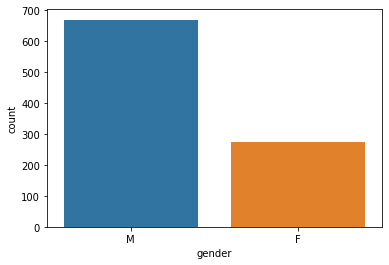

In [10]:
sns.countplot("gender", data = user_df)

<AxesSubplot:xlabel='count', ylabel='occupation'>

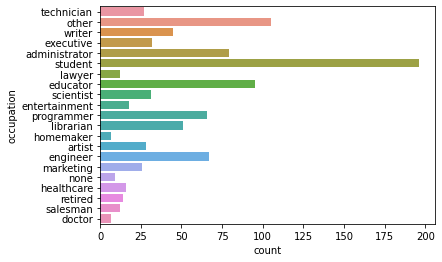

In [11]:
sns.countplot(y= "occupation", data= user_df)

In [12]:
# bar graph for occupation vs gender

In [13]:
user_df['age'].mean()

34.05196182396607

In [14]:
# age into categorical
age_groups = pd.cut(user_df.age, bins= [5,12,18,24,30,45,60,100], labels= ["Baby", "Kid", "Teen", "Adult","Professional",
                                                                           "Householder", "Elderly"])
user_df.insert(2, "age_group", age_groups)
user_df.drop("age", axis= 1)
user_df.head(10)

,user_id,age,age_group,gender,occupation
0,1,24,Teen,M,technician
1,2,53,Householder,F,other
2,3,23,Teen,M,writer
3,4,24,Teen,M,technician
4,5,33,Professional,F,other
5,6,42,Professional,M,executive
6,7,57,Householder,M,administrator
7,8,36,Professional,M,administrator
8,9,29,Adult,M,student
9,10,53,Householder,M,lawyer


<AxesSubplot:xlabel='count', ylabel='age_group'>

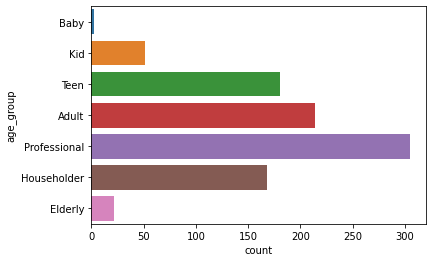

In [15]:
# color = ['blue', 'magenta', 'orange', 'black','pink', 'red', 'cyan', 'yellow', 'violet']
sns.countplot(y = "age_group", data= user_df)

### 3.2 Applying Label encoding to columns Age, Gender and Ocupation

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# gender column
le_gender= LabelEncoder()
user_df['gender']= le_gender.fit_transform(user_df['gender'])
print(user_df.head())
# le_gender.inverse_transform([1])

   user_id  age     age_group  gender  occupation
0        1   24          Teen       1  technician
1        2   53   Householder       0       other
2        3   23          Teen       1      writer
3        4   24          Teen       1  technician
4        5   33  Professional       0       other


In [18]:
# occupation column
le_occupation= LabelEncoder()
user_df['occupation']= le_occupation.fit_transform(user_df['occupation'])
print(user_df.head())

   user_id  age     age_group  gender  occupation
0        1   24          Teen       1          19
1        2   53   Householder       0          13
2        3   23          Teen       1          20
3        4   24          Teen       1          19
4        5   33  Professional       0          13


In [19]:
# age column
le_age= LabelEncoder()
user_df['age_group']= le_age.fit_transform(user_df['age_group'])
print(user_df.head())

   user_id  age  age_group  gender  occupation
0        1   24          6       1          19
1        2   53          3       0          13
2        3   23          6       1          20
3        4   24          6       1          19
4        5   33          5       0          13


In [20]:
user_df.drop("age", axis= 1)

,user_id,age_group,gender,occupation
0,1,6,1,19
1,2,3,0,13
2,3,6,1,20
3,4,6,1,19
4,5,5,0,13
...,...,...,...,...
938,939,0,0,18
939,940,5,1,0
940,941,6,1,18
941,942,3,0,10


In [21]:
user_df.iloc[0:, 1:]

,age,age_group,gender,occupation
0,24,6,1,19
1,53,3,0,13
2,23,6,1,20
3,24,6,1,19
4,33,5,0,13
...,...,...,...,...
938,26,0,0,18
939,32,5,1,0
940,20,6,1,18
941,48,3,0,10


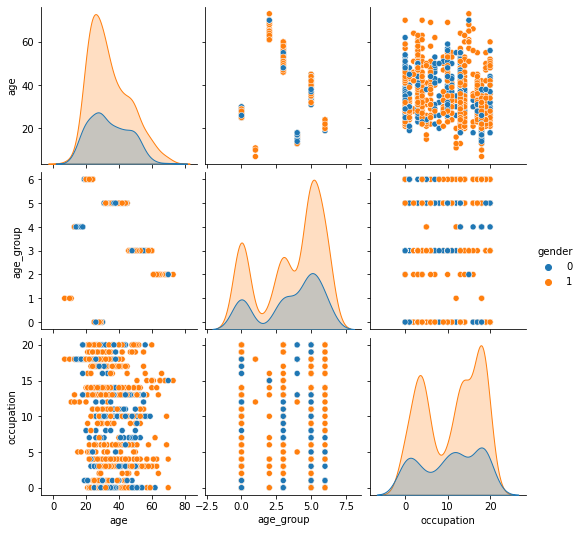

In [22]:
sns.pairplot(data= user_df.iloc[:,1:], hue= "gender")

In [23]:
user_df.corr()

,user_id,age,age_group,gender,occupation
user_id,1.000000,0.003181,-0.029658,-0.022057,0.062881
age,0.003181,1.000000,-0.076346,0.012507,-0.339664
age_group,-0.029658,-0.076346,1.000000,0.005029,0.068056
gender,-0.022057,0.012507,0.005029,1.000000,0.033217
occupation,0.062881,-0.339664,0.068056,0.033217,1.000000


<AxesSubplot:>

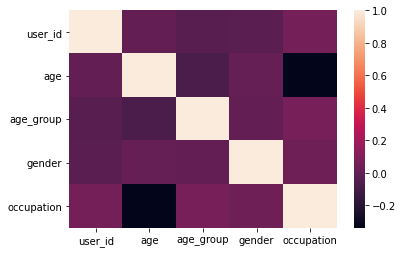

In [24]:
sns.heatmap(user_df.corr())

## 4. Clustering

In [25]:
user_df.head()

,user_id,age,age_group,gender,occupation
0,1,24,6,1,19
1,2,53,3,0,13
2,3,23,6,1,20
3,4,24,6,1,19
4,5,33,5,0,13


In [26]:
# including age and removing age group
# X = user_df.loc[:, ['age', 'gender', 'occupation']].values
# X

In [27]:
# including age group and removing age
X = user_df.iloc[:, 2:5].values
X

array([[ 6,  1, 19],
       [ 3,  0, 13],
       [ 6,  1, 20],
       ...,
       [ 6,  1, 18],
       [ 3,  0, 10],
       [ 6,  1, 18]])

In [28]:
# K-means clustering
from sklearn.cluster import KMeans

wcss = []
kValueRange = range(1,12)
for k in kValueRange:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

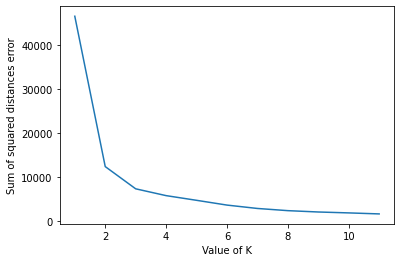

In [29]:
plt.xlabel('Value of K')
plt.ylabel('Sum of squared distances error')
plt.plot(kValueRange,wcss)

In [30]:
for i in range(1,len(wcss)):
    val= wcss[i]- wcss[i-1]
    print(("%d to %d is %d")%(i-1, i,-val))

0 to 1 is 34139
1 to 2 is 5046
2 to 3 is 1547
3 to 4 is 1063
4 to 5 is 1084
5 to 6 is 766
6 to 7 is 497
7 to 8 is 304
8 to 9 is 206
9 to 10 is 230


In [31]:
from sklearn.metrics import silhouette_score
for i in range(2,8):
    k_means_optimum = KMeans(n_clusters = int(i), random_state=42)
    y = k_means_optimum.fit_predict(X)
    score = silhouette_score(X,y)
    print("cluster: %d  score = %.2f"%(i, score*100))

cluster: 2  score = 61.83
cluster: 3  score = 53.28
cluster: 4  score = 54.55
cluster: 5  score = 45.53
cluster: 6  score = 48.76
cluster: 7  score = 49.18


In [32]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)

In [33]:
user_df['Cluster']  = y

In [34]:
user_df.head()

,user_id,age,age_group,gender,occupation,Cluster
0,1,24,6,1,19,2
1,2,53,3,0,13,0
2,3,23,6,1,20,2
3,4,24,6,1,19,2
4,5,33,5,0,13,0


In [35]:
arr = user_df['Cluster'].value_counts()
arr

1    342
2    241
0    216
3    144
Name: Cluster, dtype: int64

In [36]:
data1 = user_df[user_df.Cluster == 0]
data2 = user_df[user_df.Cluster == 1]
data3 = user_df[user_df.Cluster == 2]
data4 = user_df[user_df.Cluster == 3]


In [37]:
k_means_optimum.cluster_centers_[:,:]

array([[ 4.03240741,  0.64814815, 11.81481481],
       [ 3.52339181,  0.72807018,  2.89181287],
       [ 5.14937759,  0.70539419, 18.19917012],
       [ 0.29861111,  0.77083333, 15.89583333]])

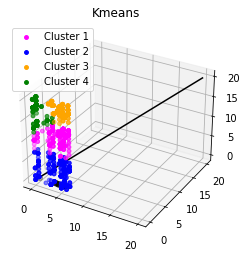

In [38]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 20, 2000)
yline = np.linspace(0, 20, 2000)
zline = np.linspace(0, 20, 2000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.age_group, data1.gender, data1.occupation, c='magenta', label = 'Cluster 1', s = 15)
kplot.scatter3D(data2.age_group, data2.gender, data2.occupation,c ='blue', label = 'Cluster 2', s= 15)
kplot.scatter3D(data3.age_group, data3.gender, data3.occupation, c='orange', label = 'Cluster 3', s = 15)
kplot.scatter3D(data4.age_group, data4.gender, data4.occupation,c ='green', label = 'Cluster 4', s= 15)
plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'black', s = 30)
plt.legend()
plt.title("Kmeans")
plt.show()

In [39]:
user_df.head()

,user_id,age,age_group,gender,occupation,Cluster
0,1,24,6,1,19,2
1,2,53,3,0,13,0
2,3,23,6,1,20,2
3,4,24,6,1,19,2
4,5,33,5,0,13,0


In [ ]:
df1 = user_df[['user_id', 'Cluster']]
df1.head(5)

In [41]:
rating_df.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
rating_df = pd.merge(rating_df, df1)
rating_df.head()

In [ ]:
rating_df[rating_df['user_id'] == 8].head()

In [46]:
rating_df['Cluster'].value_counts()

1    36246
2    25778
0    20933
3    17043
Name: Cluster, dtype: int64

In [47]:
user_df.head()

,user_id,age,age_group,gender,occupation,Cluster
0,1,24,6,1,19,2
1,2,53,3,0,13,0
2,3,23,6,1,20,2
3,4,24,6,1,19,2
4,5,33,5,0,13,0


In [48]:
rating_df.head()

,user_id,movie_id,rating,Cluster
0,196,242,3,2
1,196,393,4,2
2,196,381,4,2
3,196,251,3,2
4,196,655,5,2


In [49]:
movie_df.head()

,movie_id,movie_name,release_date,unknown_genre,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
movie = movie_df[['movie_id', 'movie_name']]
movie.head()

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [51]:
rating_df.head()

,user_id,movie_id,rating,Cluster
0,196,242,3,2
1,196,393,4,2
2,196,381,4,2
3,196,251,3,2
4,196,655,5,2


In [52]:
rating_df = pd.merge(rating_df, movie, on = "movie_id")
rating_df.head()

,user_id,movie_id,rating,Cluster,movie_name
0,196,242,3,2,Kolya (1996)
1,305,242,5,0,Kolya (1996)
2,6,242,4,1,Kolya (1996)
3,234,242,4,3,Kolya (1996)
4,63,242,3,0,Kolya (1996)


In [53]:
def collaborative_filtering(user_id):
    cluster_no = user_df.at[user_id, 'Cluster']
    new_df = rating_df.loc[rating_df['Cluster'] == cluster_no]
    df1 = new_df.groupby('movie_name').mean()['rating']
    df2 = new_df.groupby('movie_name').count()['rating']
    df12 = pd.merge(df1, df2, on = "movie_name")
    df12.rename(columns = {'rating_x':'avg_rating', 'rating_y': 'no_of_rating'}, inplace = True)
    df12  = df12.loc[df12['avg_rating'] >= 4]
    df12 = df12.sort_values(by = 'no_of_rating', ascending = False).head(10)
    df12 = df12.sort_values(by = 'avg_rating', ascending = False)
    print("Cluster No.", cluster_no)    
    print(df12)
    return list(df12.index)


In [54]:
def eclat_recommendations(user_id):
    rat = rating_df[rating_df['rating'] >= 3]
    dct = {}
    for (idx,row) in rat.iterrows():
        user = row[0]
        movie = row[4]
        ans = dct.get(user, [])
        dct[user] = ans + [movie]
    eclat_df =  pd.DataFrame.from_dict(dct, orient='index')
    eclat_df = eclat_df.reset_index()
    eclat_df.isna().sum()
    
    transactions = []
    n = eclat_df.shape[0]  #no. of rows in a dataset
    for i in range(n):
        transactions.append([str(eclat_df.values[i,j]) for j in range(0,510)])
    
    from apyori import apriori
    rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
    results = list(rules)
    
    def inspect(results):
        movie1 = [tuple(result[2][0][0])[0] for result in results]
        movie2 = [tuple(result[2][0][1])[0] for result in results]
        supports = [result[1] for result in results]
        return list(zip(movie1, movie2, supports))
    
    resultsInDataFrame = pd.DataFrame(inspect(results), columns = ['Movie1', 'Movie2', 'Support'])
    ans = resultsInDataFrame
    ans = ans[ans['Movie2'] != "nan"]
    
    user_best_movies = list(rating_df.loc[(rating_df['user_id'] == user_id) and (rating_df['rating'] >= 4)]['movie_name'].values)
    recommended_movies_list = []
    for movie in user_best_movies:
        m = list(ans[ans['Movie1' == movie]].sort_values(by = 'Support').head(1).values)
        recommend_movies_list.append(m)
    recommended_movies_list = list(set(recommended_movies_list))
    
    return recommended_movies_list

In [55]:
def recommend_movie(user_id):
    lst1 = collaborative_filtering(user_id)
    lst2 = eclat_recommendations(user_id)
    lst = lst1 + lst2
    return lst

In [56]:
rating_df.head()
rating_df.shape

(100000, 5)

In [57]:
rat = rating_df[rating_df['rating'] >= 3]
rat.shape

(82520, 5)

In [58]:
dct = {}
for (idx,row) in rat.iterrows():
    user = row[0]
    movie = row[4]
    ans = dct.get(user, [])
    dct[user] = ans + [movie]

In [59]:
eclat_df =  pd.DataFrame.from_dict(dct, orient='index')
eclat_df = eclat_df.reset_index()
# eclat_df.head()

In [60]:
eclat_df.isna().sum()

index      0
0          0
1          0
2          0
3          0
        ... 
504      942
505      942
506      942
507      942
508      942
Length: 510, dtype: int64

In [61]:
transactions = []
n = eclat_df.shape[0]  #no. of rows in a dataset
for i in range(n):
    transactions.append([str(eclat_df.values[i,j]) for j in range(510)])

In [62]:
from apyori import apriori

In [63]:
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [64]:
results = list(rules)
# results

MemoryError: 

In [ ]:
def inspect(results):
    movie1 = [tuple(result[2][0][0])[0] for result in results]
    movie2 = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    return list(zip(movie1, movie2, supports))

In [ ]:
resultsInDataFrame = pd.DataFrame(inspect(results), columns = ['Movie1', 'Movie2', 'Support'])
resultsInDataFrame.shape

In [ ]:
ans = resultsInDataFrame
ans = ans[ans['Movie2'] != "nan"]
ans.shape

In [ ]:
ans.sort_values(by = 'Movie1').head(15)

In [ ]:
# ans.nlargest(n = 1, columns= 'Support')

In [ ]:
# user_best_movies = list(rating_df.loc[(rating_df['user_id'] == user_id) and (rating_df[a'rating'] >= 4)]['movie_name'].values)

In [ ]:
recommended_movies_list = []
for movie in user_best_movies:
    m = list(ans[ans['Movie1' == movie]].sort_values(by = 'Support').head(1).values)
    recommend_movies_list.append(m)
recommended_movies_list = list(set(recommended_movies_list))
return recommended_movies_list

In [ ]:
# def correlation(user_id):
#     new_df = list(rating_df.loc[rating_df['user_id'] == user_id]['movie_name'].values)
#     movies = []
#     moviemat = rating_df.pivot_table(index = 'user_id', columns = 'movie_name', values= 'rating')
#     df1 = pd.DataFrame(new_df.groupby('movie_name').mean()['rating'])
#     df2 = pd.DataFrame(new_df.groupby('movie_name').count()['rating'])
#     df12 = pd.merge(df1, df2, on = "movie_name")
#     df12.rename(columns = {'rating_x':'avg_rating', 'rating_y': 'no_of_rating'}, inplace = True)
    
#     for movie in movies:
#         movie_name = 'Star Wars (1977)'
# #         movie_name = movie
#         movie_user_ratings = moviemat[movie_name]
#         similar_movie  = moviemat.corrwith(movie_user_ratings)
#         corr_df = pd.DataFrame(similar_movie, columns = ['Correlation'])
#         corr_df.dropna(inplace = True)
#         corr_df.sort_values(by = 'Correlation', ascending = False).head(2)
#         corr_df = corr_df.sort_values(by = 'no_of_rating', ascending = False)
#         recommendations = list(corr--------_df['movie_name'].values)
#         movies.extend(recommmendations)
#         movies_set = set(movies)
#         movies = set(movies)
#         return(movie)



        
# #     for every movie in df12, make matrix, find correlation, sort by correlation and no. of ratings, store in a list, find unique value
    
    